World Happiness Data

In the given data we learn about variables responsible for the happiness of any given country. We even learn about the ranks countries share defined by their happiness score. Here our independent variables are:-

1. Country
2. Region
3. Happiness Rank
4. Standard Error
5. Economy (GDP per Capita)
6. Family
7. Health (Life Expectancy)
8. Freedom
9. Trust (Government Corruption)
10. Generosity
11. Dystopia Residual

Our Target variable:

Happiness Score

Problem Statement:

Predict happiness score for the given data and improve the score.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pyforest            

import seaborn as sns                                                   


import statsmodels.api as sm

from scipy.stats import f
from statsmodels.formula.api import ols


import matplotlib.pyplot as plt                                         
%matplotlib inline

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
def read(link):
    global data

    data=pd.read_csv(link)
    
    data=pd.DataFrame(data)
    print(data)

In [3]:
read(link="happiness_score_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561 

In [4]:
def eda(mydata):                # Defining function
    
    pd.set_option("display.max_rows", None)         # to display all rows
    pd.set_option("display.max_columns", None)       #to display all columns
    
    print(mydata.head())                              # to display first 10 records
    print("\n")                               
    print(mydata.tail())                              # to display last 10 records
    print("\n")
    print("\n")
    
    print(mydata.info())                               # to understand attributes of the data
    
    print(data.describe())                          # to get descriptive statistics
    print("\n")
    print("\n")
    print("Skewness for the data","\n",data.skew())                              # to get skewness of the data, skewness=0 for normal distribution
    print("\n")
    print("Kurosis for the data","\n",data.kurtosis() )                         # to get kutosis, kurtosis <=3 for normal distribution
    print("\n")
    print("\n")
    
    sns.pairplot(mydata, kind='scatter', diag_kind='kde')                       # to represent data graphically
    print("\n")
    print("\n")
    
    plt.figure(figsize=(10,10))                      # plotting heat map to check correlation
    sns.heatmap(mydata.corr(method = "pearson"), annot = True)
    print("\n")    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

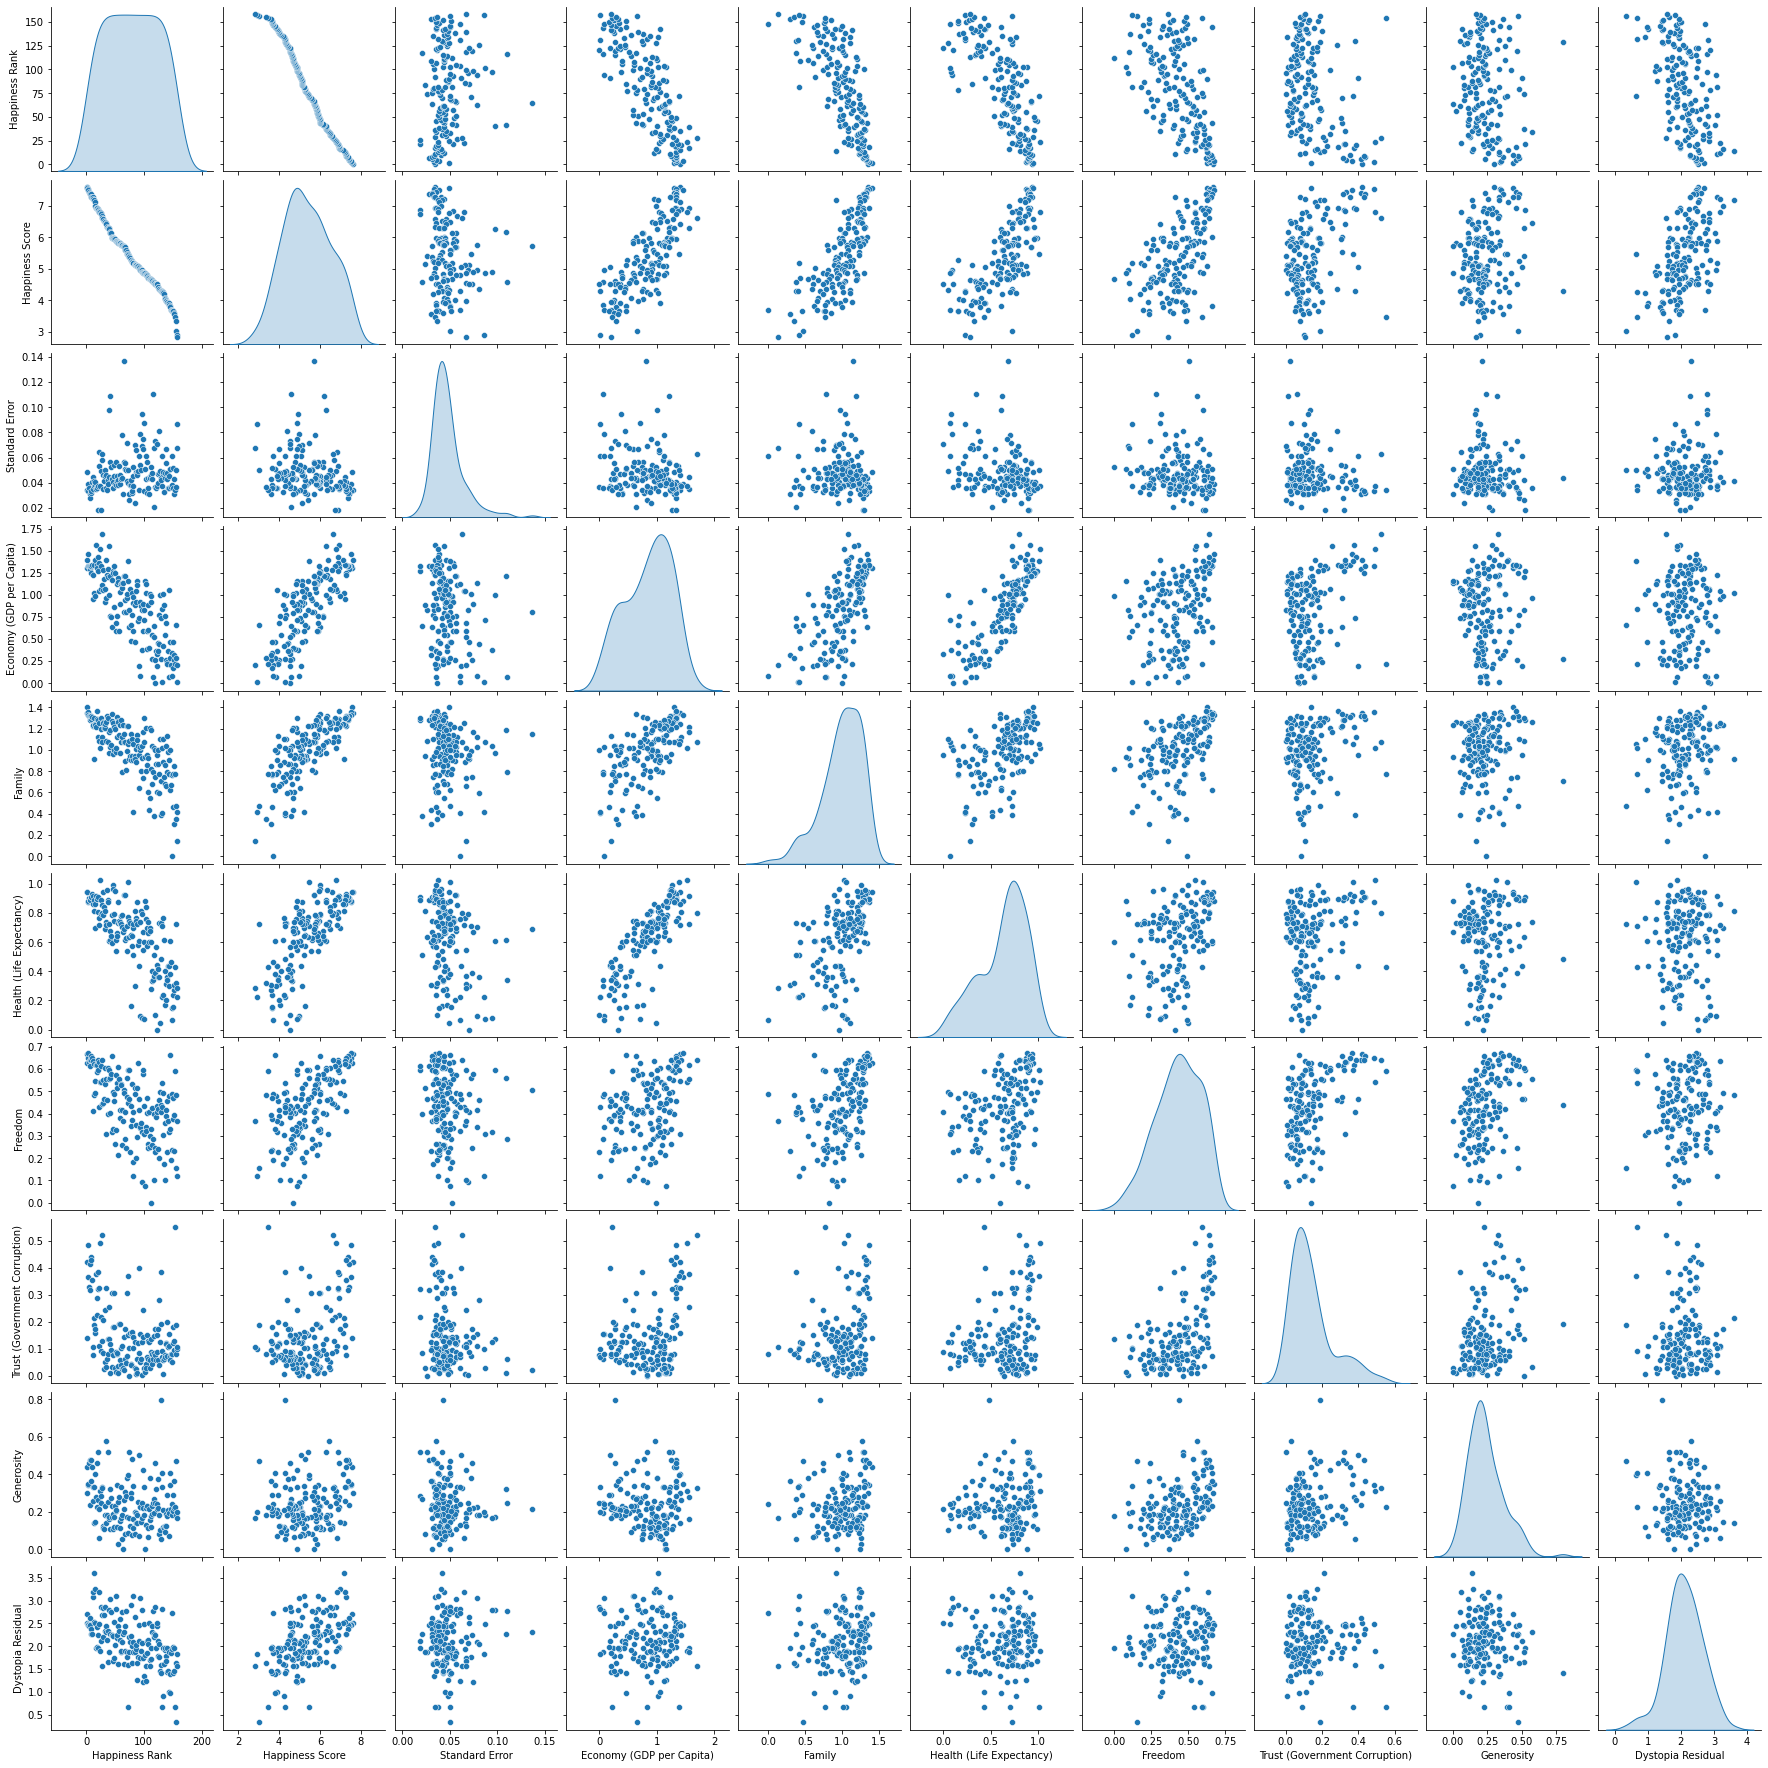

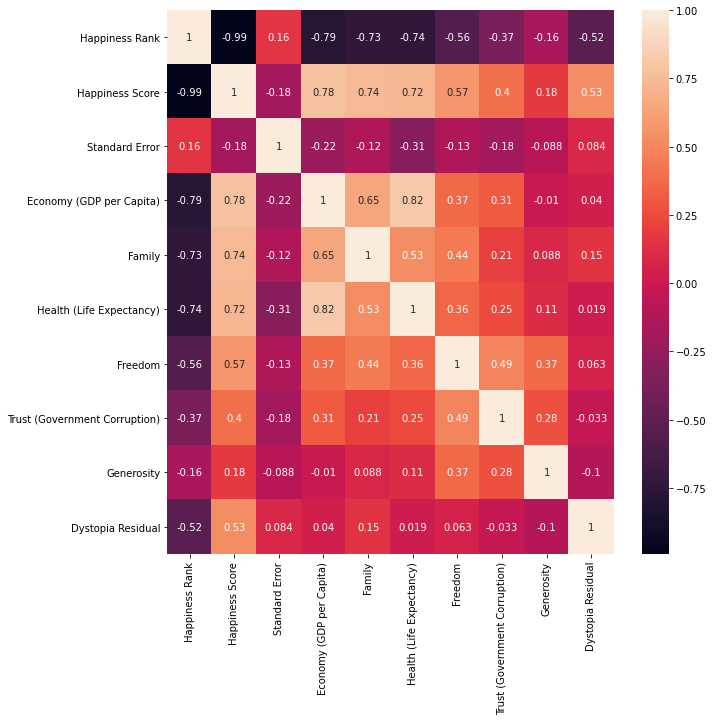

In [5]:
eda(mydata=data)

From the above presentation we learn:
1) There are no missing values in the data.

2) There are 12 columns and 158 rows in the data

3) There are 10 numerical variables and 2 string variables in the data.

4) Variables "Happiness Rank" and "Happiness Score" are very closely related to each other.

5) Data Follows a normal distribution



In [6]:
def outlier(mydata):
    for i in mydata.columns:
        fig = px.box(mydata, y= i, width=600, height=400, title=i, template="plotly_dark")
        fig.show()

In [7]:
outlier(mydata=data)

In [8]:
data_num= data.drop(['Happiness Rank','Country','Region'], axis=1)

In [9]:
def split(mydata,target):
    data_reset_index = mydata.reset_index(drop=True)
    
# Create Global Variable
    global X
    global y
    global X_train
    global X_test
    global y_train
    global y_test
    global y_pred

# Segregate Feature & Target Variables
    X = data_reset_index.drop(target, axis=1)
    y = data_reset_index[target]

# Split train & Test

    X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=1)

In [10]:
split(mydata=data_num,target='Happiness Score')

In [11]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)


model = sm.OLS(y_train, X_train).fit()


y_pred = model.predict(X_test)

print("Linear Regression Train Score: ", lr.score(X_train , y_train))

print("Linear Regression Test Score: ", lr.score(X_test , y_test))

print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(model.summary())

<IPython.core.display.Javascript object>

Linear Regression Train Score:  0.9999999429384001
Linear Regression Test Score:  0.9999999318543521


<IPython.core.display.Javascript object>

Mean Absolute Error: 0.0


<IPython.core.display.Javascript object>

Mean Squared Error: 0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 0.0
                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.898e+09
Date:                Sun, 03 Jul 2022   Prob (F-statistic):                        0.00
Time:                        22:34:57   Log-Likelihood:                          743.46
No. Observations:                 110   AIC:                                     -1471.
Df Residuals:                     102   BIC:                                     -1449.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      

In [12]:
def encode(mydata,col):
    label_encoder = preprocessing.LabelEncoder() 

    mydata[col] = label_encoder.fit_transform(mydata[col])

    mydata.head()

    print(" ")
    print(mydata)

In [13]:
encode(mydata=data,
       col="Region")

 
                      Country  Region  Happiness Rank  Happiness Score  \
0                 Switzerland       9               1            7.587   
1                     Iceland       9               2            7.561   
2                     Denmark       9               3            7.527   
3                      Norway       9               4            7.522   
4                      Canada       5               5            7.427   
5                     Finland       9               6            7.406   
6                 Netherlands       9               7            7.378   
7                      Sweden       9               8            7.364   
8                 New Zealand       0               9            7.286   
9                   Australia       0              10            7.284   
10                     Israel       4              11            7.278   
11                 Costa Rica       3              12            7.226   
12                    Austria       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

       Country  Region  Happiness Rank  Happiness Score  Standard Error  \
0  Switzerland       9               1            7.587         0.03411   
1      Iceland       9               2            7.561         0.04884   
2      Denmark       9               3            7.527         0.03328   
3       Norway       9               4            7.522         0.03880   
4       Canada       5               5            7.427         0.03553   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978

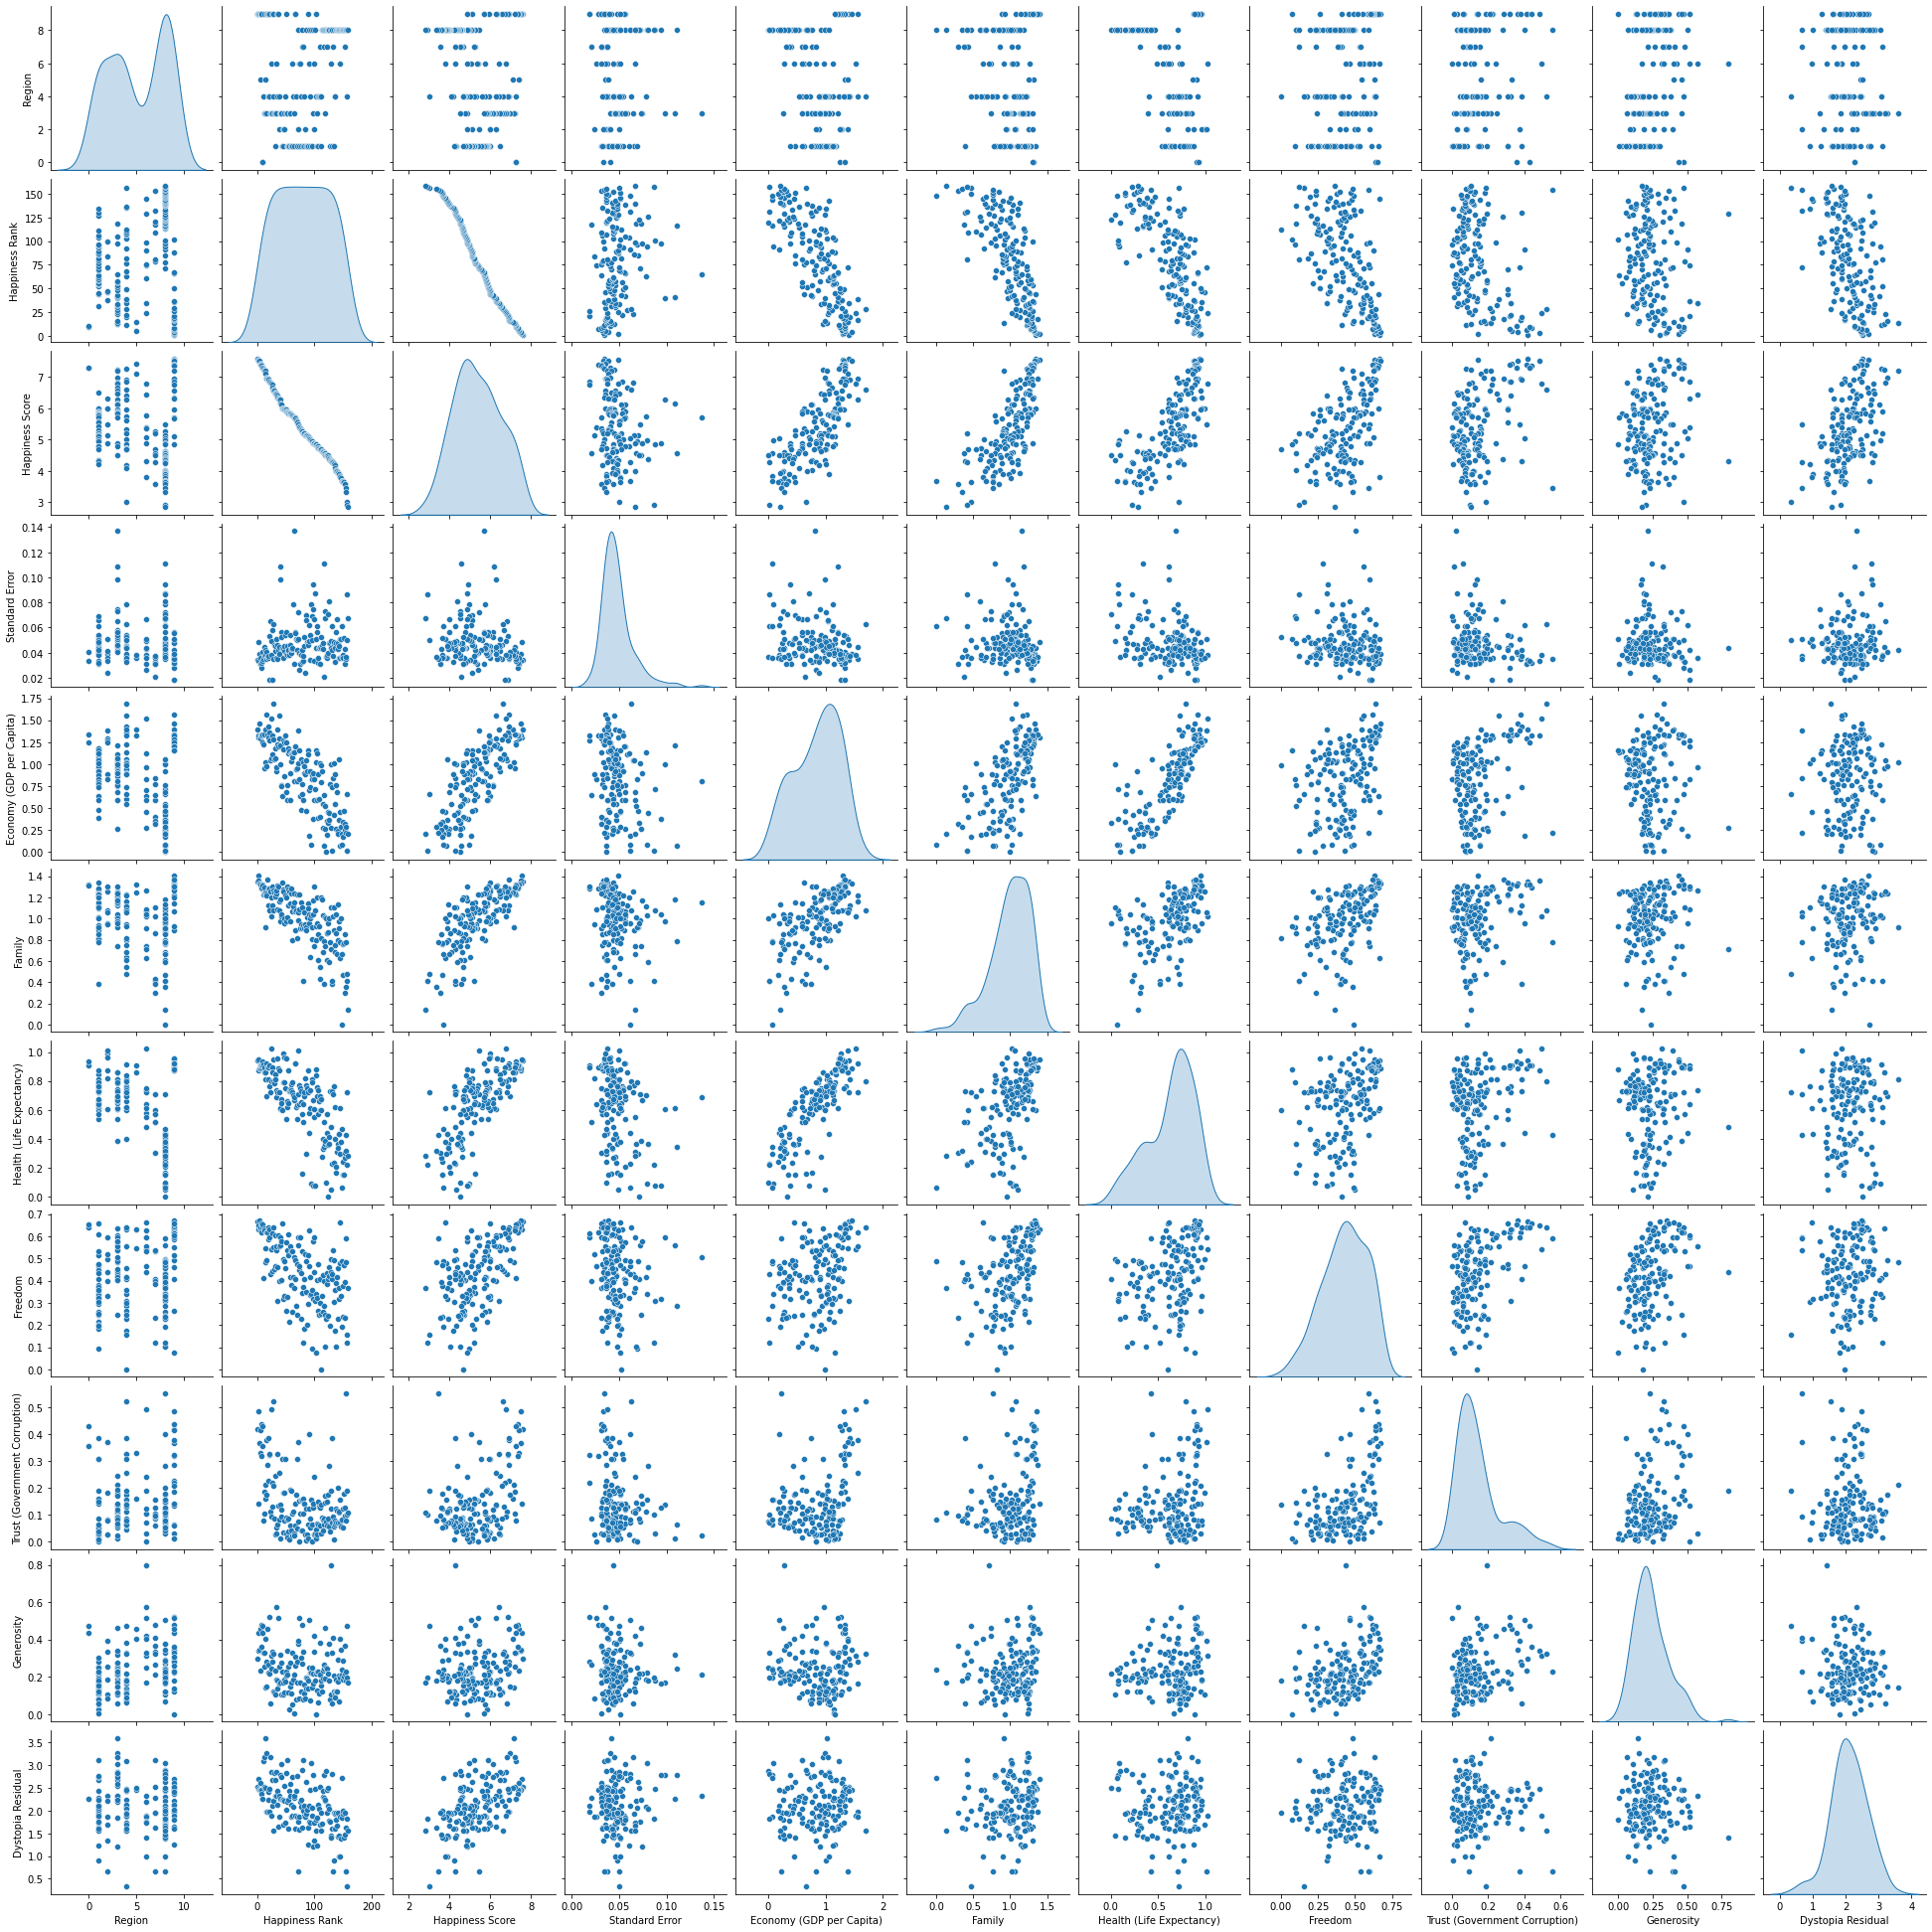

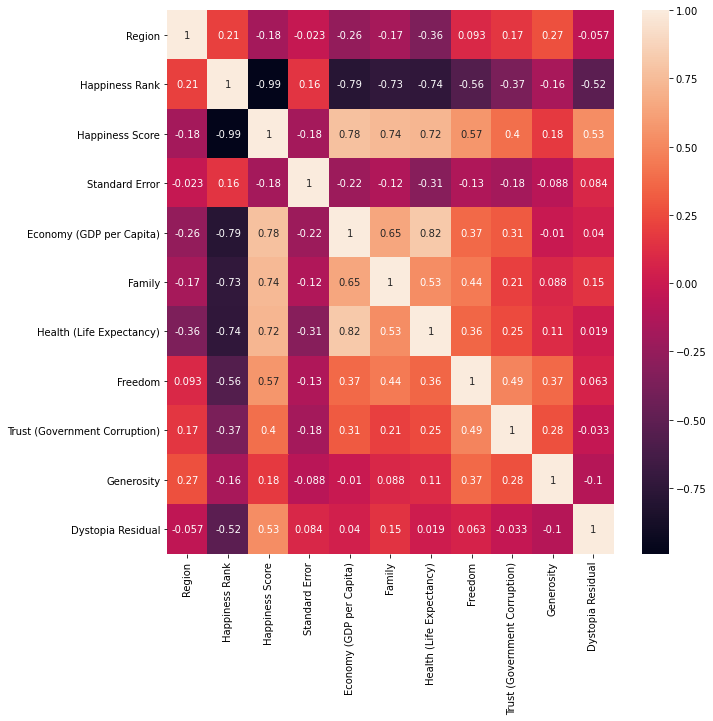

In [14]:
eda(mydata=data)

In [15]:
outlier(mydata=data)

In [16]:
# Linear Regression                                                                  
lr = LinearRegression()
lr.fit(X_train, y_train)




model = sm.OLS(y_train, X_train).fit()


y_pred = model.predict(X_test)

print("Linear Regression Train Score: ", lr.score(X_train , y_train))

print("Linear Regression Test Score: ", lr.score(X_test , y_test))

print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(model.summary())

<IPython.core.display.Javascript object>

Linear Regression Train Score:  0.9999999429384001
Linear Regression Test Score:  0.9999999318543521


<IPython.core.display.Javascript object>

Mean Absolute Error: 0.0


<IPython.core.display.Javascript object>

Mean Squared Error: 0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 0.0
                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.898e+09
Date:                Sun, 03 Jul 2022   Prob (F-statistic):                        0.00
Time:                        22:35:34   Log-Likelihood:                          743.46
No. Observations:                 110   AIC:                                     -1471.
Df Residuals:                     102   BIC:                                     -1449.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      

Lasso Regression Model

In [17]:
lasso_001 = Lasso(alpha = 0.5 , max_iter=10e5)

lasso_001.fit(X_train , y_train)


y_pred_lasso = lasso_001.predict(X_test)

print("LASSO Regression Train Score: ", lasso_001.score(X_train , y_train))

print("LASSO Regression Test Score: ", lasso_001.score(X_test , y_test))


print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_lasso),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_lasso),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),2))


coeff_used_002 = np.sum(lasso_001.coef_ != 0)

print("Coefficient used:","\n",coeff_used_002)

<IPython.core.display.Javascript object>

LASSO Regression Train Score:  0.0
LASSO Regression Test Score:  -4.371557040028229e-05


<IPython.core.display.Javascript object>

Mean Absolute Error: 0.89


<IPython.core.display.Javascript object>

Mean Squared Error: 1.12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 1.06


<IPython.core.display.Javascript object>

Coefficient used: 
 0


Ridge Regression Model

In [18]:
rr = Ridge(alpha = 0.5)                                                   # alpha = regularization hyper-parameter (Selected)

rr.fit(X_train, y_train)



y_pred_rr = rr.predict(X_test)

print("Ridge Regression Train Score: ", rr.score(X_train, y_train))
print("Ridge Regression Test Score: ", rr.score(X_test, y_test))

print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_rr),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_rr),2))
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)),2))



coeff_used_001 = np.sum(rr.coef_ != 0)

print("Coefficient used:","\n",coeff_used_001)

<IPython.core.display.Javascript object>

Ridge Regression Train Score:  0.9987871253750285
Ridge Regression Test Score:  0.9988238333987811


<IPython.core.display.Javascript object>

Mean Absolute Error: 0.03


<IPython.core.display.Javascript object>

Mean Squared Error: 0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 0.04


<IPython.core.display.Javascript object>

Coefficient used: 
 8


Elastic Net Regression Model

In [19]:
lm_elastic = ElasticNet(alpha = 0.5)

lm_elastic.fit(X_train, y_train)



y_pred_elastic = lm_elastic.predict(X_test)


print("Elastic Net Train Score: ", lm_elastic.score(X_train , y_train))

print("Elastic Net Test Score: ", lm_elastic.score(X_test , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_pred_elastic),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_pred_elastic),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic)),2))

coeff_used_003 = np.sum(lm_elastic.coef_ != 0)

print("Coefficient used:","\n",coeff_used_003)

<IPython.core.display.Javascript object>

Elastic Net Train Score:  0.24862163575051122
Elastic Net Test Score:  0.23503112245389546


<IPython.core.display.Javascript object>

Mean Absolute Error: 
 0.78
 


<IPython.core.display.Javascript object>

Mean Squared Error: 
 0.86
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 
 0.93


<IPython.core.display.Javascript object>

Coefficient used: 
 2


Generating Polynomial features

In [20]:
poly_features= PolynomialFeatures(degree=2)                       # second order polynomial regression

poly_features.fit(X_train)                                       # TRAIN = fit_transform

X_train_poly = poly_features.transform(X_train)                  # x_train_poly = poly_features.fit_transform(X_train)
X_test_poly =  poly_features.transform(X_test)                   # x_test_poly = poly_features.transform(x_test)

<IPython.core.display.Javascript object>

In [21]:
### Polynomial Regression                                                        

lr = LinearRegression()
lr.fit(X_train_poly, y_train)


model = sm.OLS(y_train, X_train_poly).fit()


y_pred = model.predict(X_test_poly)

print("Linear Regression Train Score: ", lr.score(X_train_poly , y_train))

print("Linear Regression Test Score: ", lr.score(X_test_poly , y_test))

print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(model.summary())

<IPython.core.display.Javascript object>

Linear Regression Train Score:  0.9999999685935217
Linear Regression Test Score:  0.9999998251871726


<IPython.core.display.Javascript object>

Mean Absolute Error: 0.0


<IPython.core.display.Javascript object>

Mean Squared Error: 0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 0.0
                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.704e+07
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          5.80e-230
Time:                        22:35:34   Log-Likelihood:                 776.37
No. Observations:                 110   AIC:                            -1463.
Df Residuals:                      65   BIC:                            -1341.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.073e-05  

In [22]:
rr = Ridge(alpha = 0.5)                                                   # alpha = regularization hyper-parameter

rr.fit(X_train_poly, y_train)



y_pred_rr_poly = rr.predict(X_test_poly)

print("Ridge Regression Train Score: ", rr.score(X_train_poly, y_train))

print("Ridge Regression Test Score: ", rr.score(X_test_poly, y_test))

print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_rr_poly),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_rr_poly),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr_poly)),2))
coeff_used_001 = np.sum(rr.coef_ != 0)

print("Coefficient used:","\n",coeff_used_001)

<IPython.core.display.Javascript object>

Ridge Regression Train Score:  0.9966965371179176
Ridge Regression Test Score:  0.9954270826210805


<IPython.core.display.Javascript object>

Mean Absolute Error: 0.05


<IPython.core.display.Javascript object>

Mean Squared Error: 0.01


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 0.07


<IPython.core.display.Javascript object>

Coefficient used: 
 44


In [23]:
lasso_001 = Lasso(alpha = 0.5 , max_iter=10e5)

lasso_001.fit(X_train_poly , y_train)


y_pred_lasso_poly = lasso_001.predict(X_test_poly)

print("LASSO Regression Train Score: ", lasso_001.score(X_train_poly , y_train))

print("LASSO Regression Test Score: ", lasso_001.score(X_test_poly , y_test))


print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_lasso_poly),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_lasso_poly),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_poly)),2))
coeff_used_002 = np.sum(lasso_001.coef_ != 0)

print("Coefficient used:","\n",coeff_used_002)

<IPython.core.display.Javascript object>

LASSO Regression Train Score:  0.6776277763613785
LASSO Regression Test Score:  0.6667201354782197


<IPython.core.display.Javascript object>

Mean Absolute Error: 0.52


<IPython.core.display.Javascript object>

Mean Squared Error: 0.37


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 0.61


<IPython.core.display.Javascript object>

Coefficient used: 
 2


In [24]:
lm_elastic = ElasticNet(alpha = 0.5)

lm_elastic.fit(X_train_poly, y_train)



y_pred_elastic_poly = lm_elastic.predict(X_test_poly)


print("Elastic Net Train Score: ", lm_elastic.score(X_train_poly , y_train))

print("Elastic Net Test Score: ", lm_elastic.score(X_test_poly , y_test))

print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_pred_elastic_poly),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_pred_elastic_poly),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic_poly)),2))
coeff_used_003 = np.sum(lm_elastic.coef_ != 0)

print("Coefficient used:","\n",coeff_used_003)

<IPython.core.display.Javascript object>

Elastic Net Train Score:  0.7818464386274184
Elastic Net Test Score:  0.7759626159677081


<IPython.core.display.Javascript object>

Mean Absolute Error: 
 0.41
 


<IPython.core.display.Javascript object>

Mean Squared Error: 
 0.25
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error: 
 0.5


<IPython.core.display.Javascript object>

Coefficient used: 
 4


Conclusion:

Linear Regression seems to overfit the model.
Ridge Regression is more appropriate